## Dependencies and Setup

In [1]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Declare World's ISO Alpha-3 Code value to WRD
world_iso3 = 'WRD'
pd.set_option('display.max_rows', 1000)

## Load Countries to Observe into DataFrame

In [2]:
country_csv_path = "Resources/Country/Country.csv"
country_df = pd.read_csv(country_csv_path)
# Set World's ISO Alpha-3 Code value to WRD
country_df = country_df.set_index('Country Name')
country_df.loc['World', 'ISO alpha-3 Code'] = world_iso3
country_df = country_df.reset_index()

## Set FAO stardand url parametrs

In [3]:
fao_area = 'area=' + '%2C'.join(country_df['GFN Country Code'].apply(str))
fao_year = '&year=' + '%2C'.join(np.arange(1995,2019).astype(str))
fao_area_cs = '&area_cs=FAO'
fao_item_cs = '&item_cs=FAO'
fao_tail = '&show_codes=true&show_unit=true&show_flags=true&null_values=false&output_type=csv'

## Trade : Livestock Products (Import)

In [4]:
# Trade: Livestock Products (Import/Export)
# Set url parametrs
fao_base_url = 'http://fenixservices.fao.org/faostat/api/v1/en/data/TP?'
area_str = '231'
fao_area = '&area=' + area_str
element_str = '2610'
fao_element = '&element=' + element_str
item_str = '2077'
fao_item = '&item=' + item_str

# finalize fao url
tr_fao_url = fao_base_url + fao_area + fao_area_cs + fao_element + fao_item + fao_item_cs + fao_year + fao_tail
fao_value = '&value='

# Request Trade: Livestock Products Data from FOA
response = requests.get(tr_fao_url)
decoded_content = response.content.decode('ISO-8859-1')
# Store CSV to DataFrame
pd.set_option('display.max_rows', 100)
fao_tr_import_df = pd.read_csv(io.BytesIO(response.content), encoding='ISO-8859-1')
fao_tr_import_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1995,1995,tonnes,1110292,A,"Aggregate, may include official, semi-official..."
1,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1996,1996,tonnes,1199617,A,"Aggregate, may include official, semi-official..."
2,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1997,1997,tonnes,1335282,A,"Aggregate, may include official, semi-official..."
3,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1998,1998,tonnes,1509419,A,"Aggregate, may include official, semi-official..."
4,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1999,1999,tonnes,1671894,A,"Aggregate, may include official, semi-official..."


### Trade : Livestock Products (IMPORT)

In [5]:
# Trade: Livestock Products (Import/Export)
# Set url parametrs
fao_base_url = 'http://fenixservices.fao.org/faostat/api/v1/en/data/TP?'
area_str = '21%2C351%2C100%2C185%2C202%2C231%2C5000%2C5706%2C5815'

fao_area = '&area=' + area_str
element_str = '2610'
fao_element = '&element=' + element_str
item_str = '2077'
fao_item = '&item=' + item_str


# finalize fao url
tr_fao_url = fao_base_url + fao_area + fao_area_cs + fao_element + fao_item  + fao_item_cs + fao_year + fao_tail

# Request Trade: Livestock Products Data from FOA
response = requests.get(tr_fao_url)
decoded_content = response.content.decode('ISO-8859-1')
# Store CSV to DataFrame
fao_tr_import_df = pd.read_csv(io.BytesIO(response.content), encoding='ISO-8859-1')
fao_tr_import_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TP,Crops and livestock products,21,Brazil,5610,Import Quantity,2077,Total Meat,1995,1995,tonnes,142763,A,"Aggregate, may include official, semi-official..."
1,TP,Crops and livestock products,21,Brazil,5610,Import Quantity,2077,Total Meat,1996,1996,tonnes,153815,A,"Aggregate, may include official, semi-official..."
2,TP,Crops and livestock products,21,Brazil,5610,Import Quantity,2077,Total Meat,1997,1997,tonnes,127960,A,"Aggregate, may include official, semi-official..."
3,TP,Crops and livestock products,21,Brazil,5610,Import Quantity,2077,Total Meat,1998,1998,tonnes,91402,A,"Aggregate, may include official, semi-official..."
4,TP,Crops and livestock products,21,Brazil,5610,Import Quantity,2077,Total Meat,1999,1999,tonnes,49304,A,"Aggregate, may include official, semi-official..."


In [6]:
fao_tr_import_df[['Area', 'Value']]
area_group_df = fao_tr_import_df.groupby(['Area'])
BRICS_Sum = area_group_df.sum()['Value']
Remaining_List_Sum = area_group_df.sum()['Value']

In [7]:
BRICS_List = ['Brazil', 'China', 'India', 'Russian Federation', 'South Africa' ]

#BRICS_value.df = BRICS_List.

In [8]:
#BRICS_Sum[BRICS_List]
BRICS_Sum = BRICS_Sum[BRICS_List]
BRICS_Sum = pd.Series([BRICS_Sum.sum()], index=['BRICS'])

In [9]:
Remaining_List = ['European Union', 'Low Income Food Deficit Countries', 'United States of America']
World = Remaining_List_Sum['World']
Remaining_List_Sum = Remaining_List_Sum[(Remaining_List)]
print (Remaining_List_Sum)

Area
European Union                       262039323
Low Income Food Deficit Countries     15533390
United States of America              39001075
Name: Value, dtype: int64


In [10]:
#print (Remaining_List_Sum, BRICS_Sum)
pd.concat([Remaining_List_Sum, BRICS_Sum])

European Union                       262039323
Low Income Food Deficit Countries     15533390
United States of America              39001075
BRICS                                116065591
dtype: int64

In [11]:
Output_df = pd.DataFrame(pd.concat([Remaining_List_Sum, BRICS_Sum]))

In [12]:
Output_df.columns = ['Quantity']

In [13]:
Output_df

,Quantity
European Union,262039323
Low Income Food Deficit Countries,15533390
United States of America,39001075
BRICS,116065591


In [14]:
Output_df["%"] = Output_df ['Quantity']/World


In [15]:
Output_df = Output_df.reset_index()

In [16]:
x_axis = Output_df["index"]
y_axis = Output_df["Quantity"]/1000
World = World / 1000
import_results = y_axis

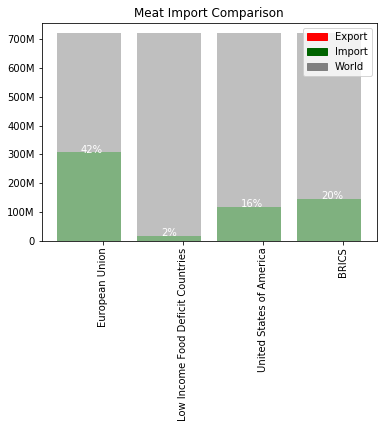

In [59]:
ax = plt.bar(x_axis,y_axis, color='darkgreen', alpha=0.5, align="center")
y_axis_world = [World,World,World,World]
plt.bar(x_axis,(y_axis_world-y_axis), color='grey', alpha=0.5, align="center", bottom=y_axis)
plt.xticks(rotation='vertical')

rects = ax.patches
for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    percentY = str(int(y_value/World*100)) + '%'
    plt.text(x_value-0.1, y_value, percentY, color='w')

plt.xticks([0.175,1.175,2.175, 3.175],Output_df["index"],rotation='vertical')
plt.yticks([0, 100000,200000,300000,400000,500000,600000,700000],['0','100M', '200M', '300M', '400M', '500M', '600M', '700M'])
plt.title("Meat Import Comparison")
green_patch = mpatches.Patch(color='darkgreen', label='Import')
green_patch = mpatches.Patch(color='grey', label='World')
plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.savefig('Import_Bar_Graph.png')

### Trade : Livestock Products (EXPORT)

In [18]:
# Trade: Livestock Products (Import/Export)
# Set url parametrs
fao_base_url = 'http://fenixservices.fao.org/faostat/api/v1/en/data/TP?'
area_str = '21%2C351%2C100%2C185%2C202%2C231%2C5000%2C5706%2C5815'

fao_area = '&area=' + area_str
element_str = '2910'
fao_element = '&element=' + element_str
item_str = '2077'
fao_item = '&item=' + item_str


# finalize fao url
tr_fao_url = fao_base_url + fao_area + fao_area_cs + fao_element + fao_item  + fao_item_cs + fao_year + fao_tail

# Request Trade: Livestock Products Data from FOA
response = requests.get(tr_fao_url)
decoded_content = response.content.decode('ISO-8859-1')
# Store CSV to DataFrame
fao_tr_export_df = pd.read_csv(io.BytesIO(response.content), encoding='ISO-8859-1')
fao_tr_export_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TP,Crops and livestock products,21,Brazil,5910,Export Quantity,2077,Total Meat,1995,1995,tonnes,682506,A,"Aggregate, may include official, semi-official..."
1,TP,Crops and livestock products,21,Brazil,5910,Export Quantity,2077,Total Meat,1996,1996,tonnes,846177,A,"Aggregate, may include official, semi-official..."
2,TP,Crops and livestock products,21,Brazil,5910,Export Quantity,2077,Total Meat,1997,1997,tonnes,679643,A,"Aggregate, may include official, semi-official..."
3,TP,Crops and livestock products,21,Brazil,5910,Export Quantity,2077,Total Meat,1998,1998,tonnes,1003407,A,"Aggregate, may include official, semi-official..."
4,TP,Crops and livestock products,21,Brazil,5910,Export Quantity,2077,Total Meat,1999,1999,tonnes,1314947,A,"Aggregate, may include official, semi-official..."


In [19]:
fao_tr_import_df[['Area', 'Value']]
area_group_df = fao_tr_export_df.groupby(['Area'])
BRICS_Sum = area_group_df.sum()['Value']
Remaining_List_Sum = area_group_df.sum()['Value']

In [20]:
BRICS_List = ['Brazil', 'China', 'India', 'Russian Federation', 'South Africa' ]

#BRICS_value.df = BRICS_List.

In [21]:
#BRICS_Sum[BRICS_List]
BRICS_Sum = BRICS_Sum[BRICS_List]
BRICS_Sum = pd.Series([BRICS_Sum.sum()], index=['BRICS'])

In [22]:
Remaining_List = ['European Union', 'Low Income Food Deficit Countries', 'United States of America']
World = Remaining_List_Sum['World']
Remaining_List_Sum = Remaining_List_Sum[(Remaining_List)]
print (Remaining_List_Sum)

Area
European Union                       306480006
Low Income Food Deficit Countries     16279602
United States of America             118372375
Name: Value, dtype: int64


In [23]:
Output_df = pd.DataFrame(pd.concat([Remaining_List_Sum, BRICS_Sum]))

In [24]:
#print (Remaining_List_Sum, BRICS_Sum)
pd.concat([Remaining_List_Sum, BRICS_Sum])

European Union                       306480006
Low Income Food Deficit Countries     16279602
United States of America             118372375
BRICS                                144186550
dtype: int64

In [25]:
Output_df = pd.DataFrame(pd.concat([Remaining_List_Sum, BRICS_Sum]))

In [26]:
Output_df.columns = ['Quantity']

In [27]:
Output_df

,Quantity
European Union,306480006
Low Income Food Deficit Countries,16279602
United States of America,118372375
BRICS,144186550


In [28]:
Output_df = Output_df.reset_index()

In [29]:
Output_df["%"] = Output_df ['Quantity']/World
Output_df = Output_df.reset_index()
x_axis = Output_df["index"]
y_axis = Output_df["Quantity"]/1000
World = World / 1000

export_results = y_axis

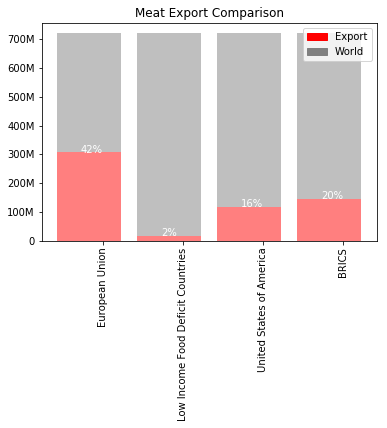

In [58]:
ax = plt.bar(x_axis,y_axis, color='r', alpha=0.5, align="center")
y_axis_world = [World,World,World,World]
plt.bar(x_axis,(y_axis_world-y_axis), color='grey', alpha=0.5, align="center", bottom=y_axis)
plt.xticks(rotation='vertical')

rects = ax.patches
for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    percentY = str(int(y_value/World*100)) + '%'
    plt.text(x_value-0.1, y_value, percentY, color='w')

plt.xticks([0.175,1.175,2.175, 3.175],Output_df["index"],rotation='vertical')
plt.yticks([0, 100000,200000,300000,400000,500000,600000,700000],['0','100M', '200M', '300M', '400M', '500M', '600M', '700M'])
plt.title("Meat Export Comparison")
red_patch = mpatches.Patch(color='red', label='Export')
grey_patch = mpatches.Patch(color='grey', label='World')
plt.legend(handles=[red_patch,grey_patch])
plt.savefig('Export_Bar_Graph.png')

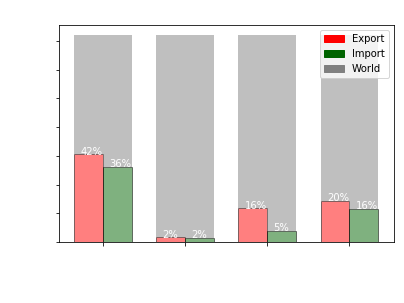

In [57]:
#Merge Export & Import
x_axis = np.arange(4)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()
ax.bar(x_axis,export_results, width, edgecolor = 'black', color='red', alpha=0.5, align="center")
ax.bar(x_axis + width,import_results, width, color='darkgreen', edgecolor = 'black', alpha=0.5, align="center")
rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    percentY = str(int(y_value/World*100)) + '%'
    plt.text(x_value-0.1, y_value, percentY, color='w')

y_axis_world = [World,World,World,World]
rects1 = ax.bar(x_axis,(y_axis_world-export_results), width, color='grey', alpha=0.5, align="center", bottom=export_results)
rects2 = ax.bar(x_axis + width,(y_axis_world-import_results), width, color='grey', alpha=0.5, align="center", bottom=import_results)

#plt.xticks([0.175,1.175,2.175, 3.175],Output_df["index"],rotation='vertical')
plt.xticks([0.175,1.175,2.175, 3.175],['EU', 'LIFDC', 'US', 'BRICS'],rotation='vertical', color = 'w')
plt.yticks([0, 100000,200000,300000,400000,500000,600000,700000],['0','100M', '200M', '300M', '400M', '500M', '600M', '700M'], color = 'w')
plt.title("MEAT IMPORT & EXPORT COMPARISON", fontsize=16, color = 'w')
plt.xlabel('COUNTRY GROUPING', fontsize=12, color = 'w')
plt.ylabel('QUANTITY', fontsize=12, color = 'w')
red_patch = mpatches.Patch(color='red', label='Export')
blue_patch = mpatches.Patch(color='darkgreen', label='Import')
grey_patch = mpatches.Patch(color='grey', label='World')
plt.legend(handles=[red_patch,blue_patch,grey_patch])
plt.savefig('Overall_Bar_Graph.png')